# Image Overlay #

This overlays the frame with a small 256 tone image



First you download the bit file.

In [1054]:
from pynq.overlays.video import *
from pynq.lib.video import *

base = VideoOverlay("video.bit")
hdmi_in = base.video.hdmi_in
hdmi_out = base.video.hdmi_out

Then start up the PRControl, the video will not work otherwise. It initailzes the Video Axi Switch so HDMI runs through the VDMA.

In [1055]:
from pynq.overlays.video import PRControl
pr_inst = PRControl()

The best video sources are computers where you can control the resoltuion.

In [1056]:
hdmi_in.configure()
hdmi_out.configure(hdmi_in.mode,PIXEL_BGR)
hdmi_out.start()
hdmi_in.start()
hdmi_in.tie(hdmi_out)

Here is a frame in VDMA.

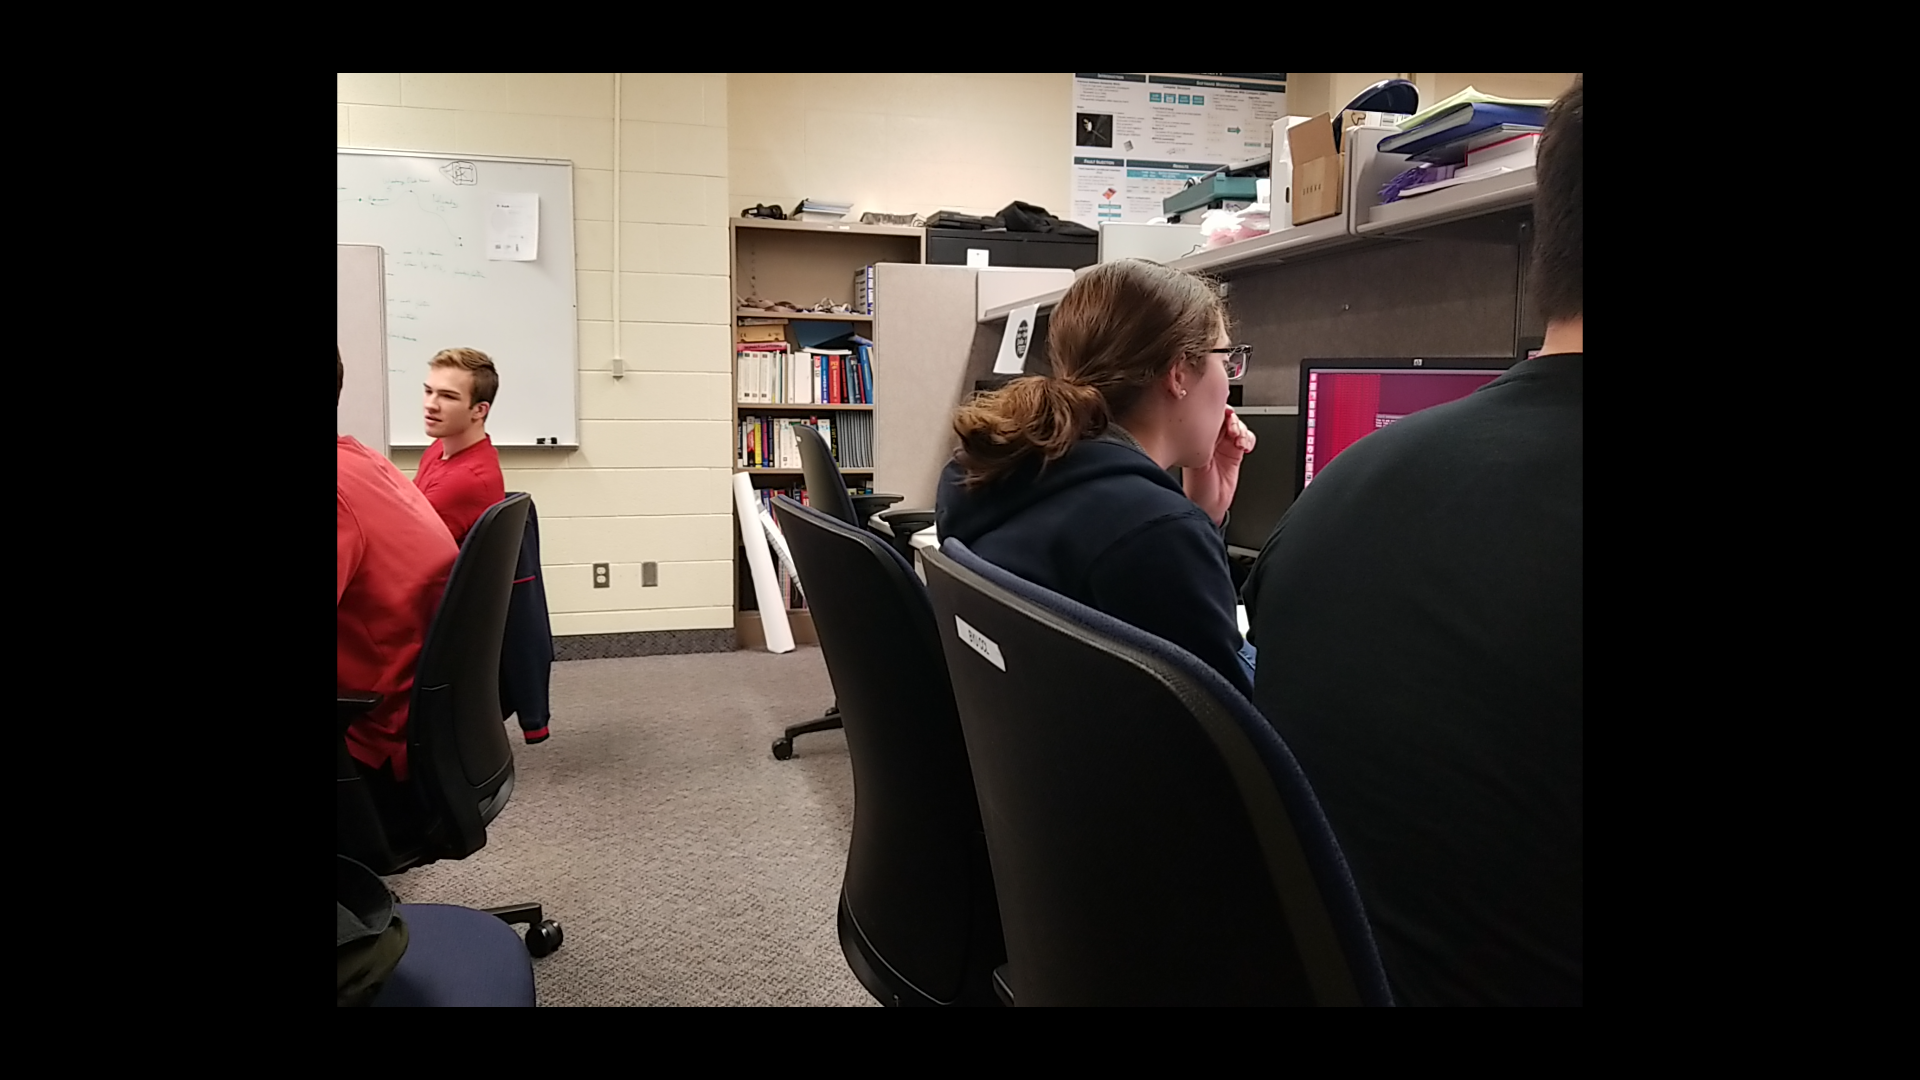

In [1057]:
import PIL.Image
import cv2
frame = hdmi_in.readframe()
frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
image = PIL.Image.fromarray(frame)
image

The Image Overlay has to be loaded in.  The image overlay only fits into L0

Connect the HDMI_IN to L0 and L0 to VDMA and VDMA to HDMI_OUT

In [1058]:
pr_inst.connect("HDMI_IN","L0")
pr_inst.connect("L0","VDMA")
pr_inst.connect("VDMA","HDMI_OUT")
PartialBitstream("image_l0.bit").download()

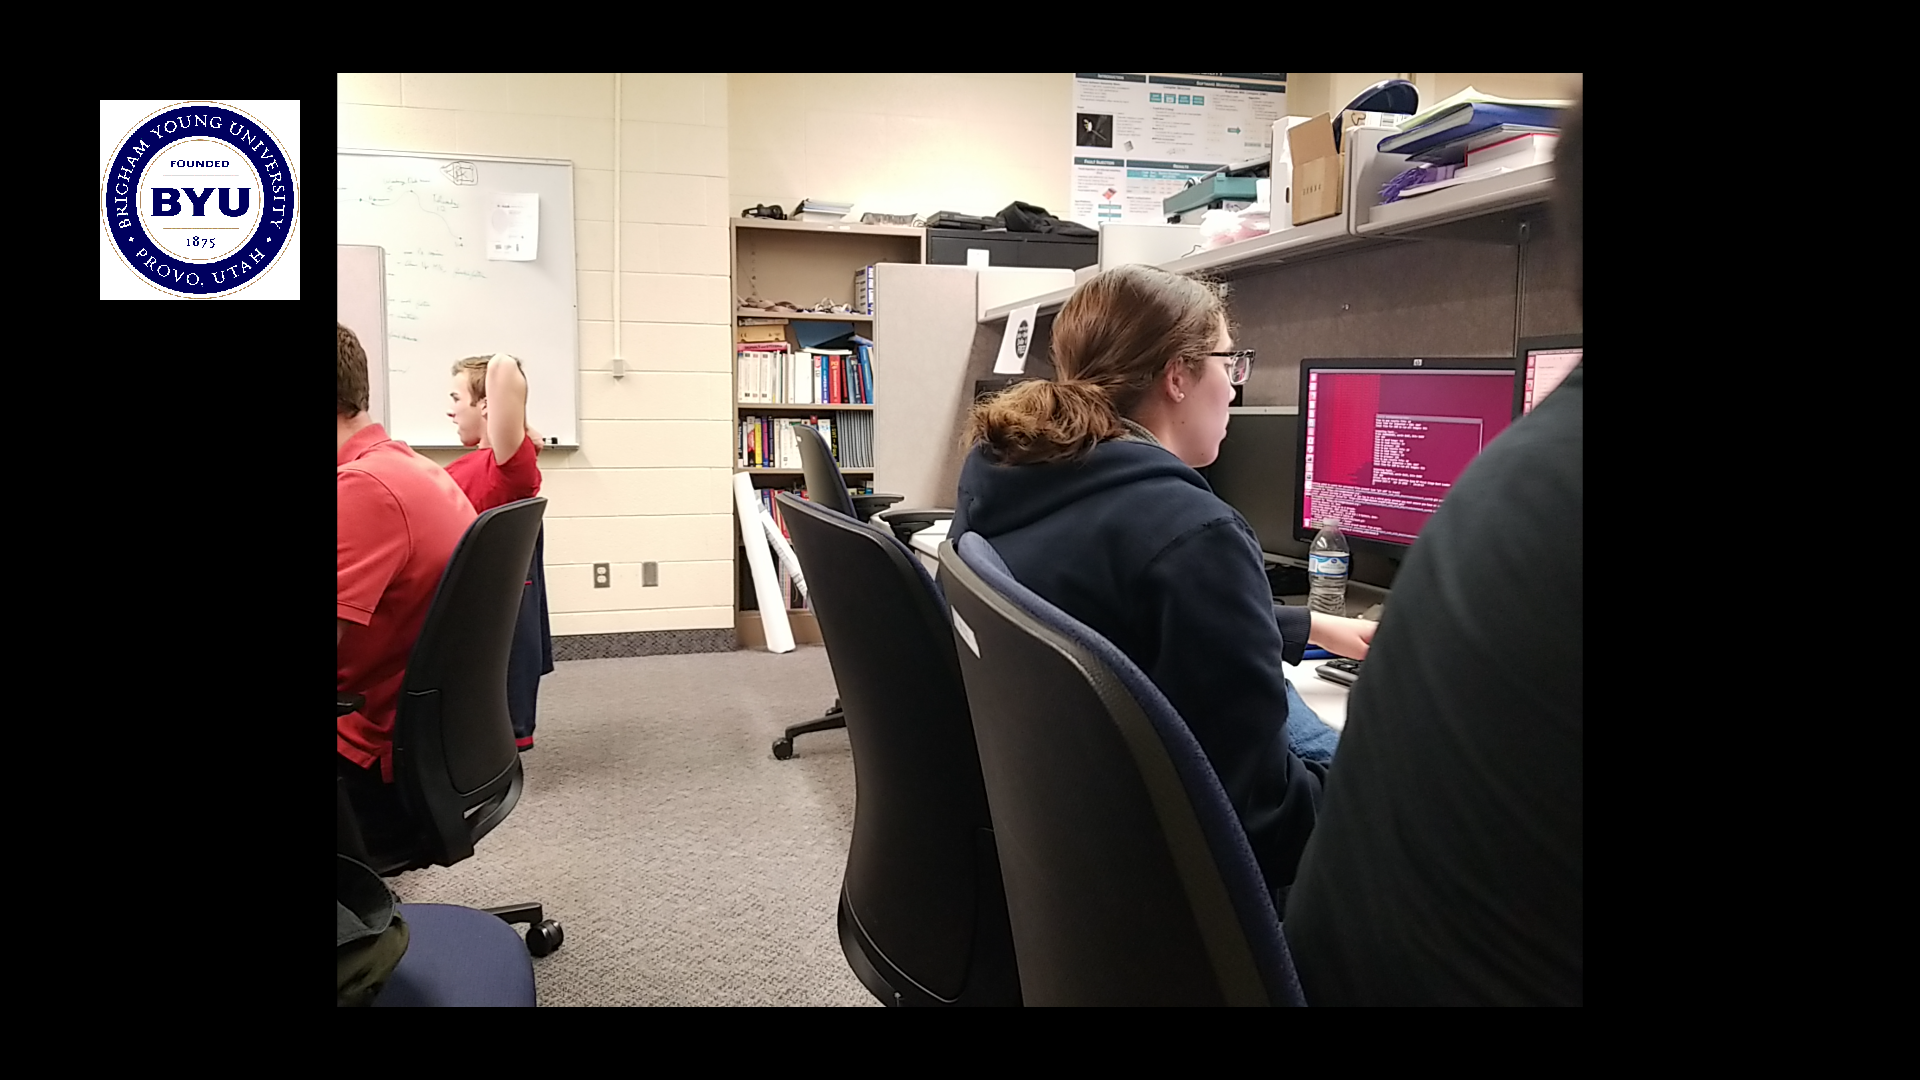

In [1046]:
import PIL.Image
import cv2
frame = hdmi_in.readframe()
frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
image = PIL.Image.fromarray(frame)
image

Now we can change the settings of the sobel filter
#### Image Overlay Settings ####
* 0 Set X Offset
* 1 Set Y Offset
* 2 Set Width
* 3 Set Height
* 4 Write Pixel & increment write index
* 5 Set Write Index
* 6 Set Transparent Color


pr_inst.filter_cmd("filter name",cmd,data)

[256 Colors](http://www.calmar.ws/vim/256-xterm-24bit-rgb-color-chart.html)

Try out different images

In [1047]:
pr_inst.filter_cmd("L0",0,400)
pr_inst.filter_cmd("L0",1,300)
pr_inst.filter_cmd("L0",6,0)
pr_inst.filter_cmd("L0",5,0)
filename = "./BYU_Stretch_Y.bin"
with open(filename, "rb") as f:
    width = f.read(1)
    height = f.read(1)
    num_pixels = width[0]*height[0]
    for i in range(0, num_pixels):
            byte = f.read(1)
            x = byte[0];
            pr_inst.filter_cmd("L0",4,x)

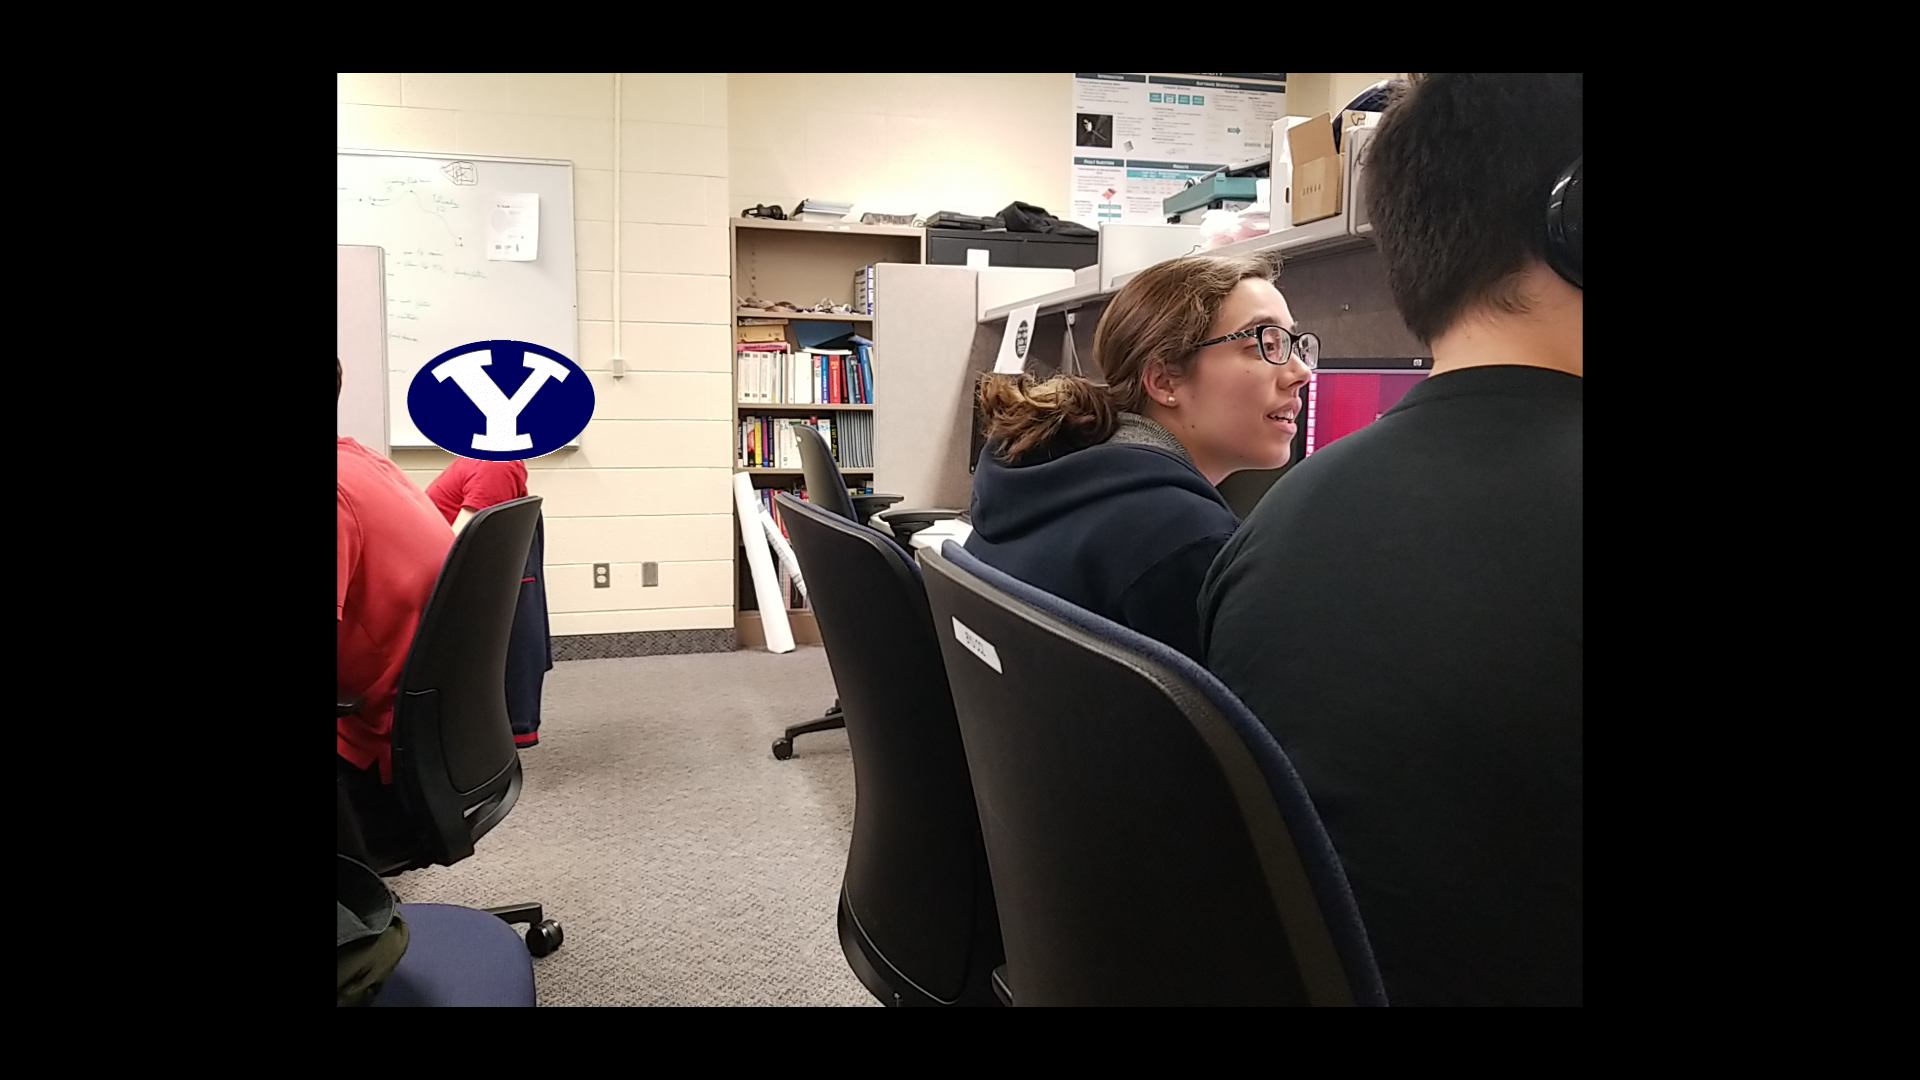

In [1048]:
import PIL.Image
import cv2
frame = hdmi_in.readframe()
frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
image = PIL.Image.fromarray(frame)
image

In [1061]:
pr_inst.filter_cmd("L0",0,1700)
pr_inst.filter_cmd("L0",1,860)
pr_inst.filter_cmd("L0",6,0)
pr_inst.filter_cmd("L0",5,0)
filename = "./cougar_256.bin"
with open(filename, "rb") as f:
    width = f.read(1)
    height = f.read(1)
    num_pixels = width[0]*height[0]
    for i in range(0, num_pixels):
            byte = f.read(1)
            x = byte[0];
            pr_inst.filter_cmd("L0",4,x)

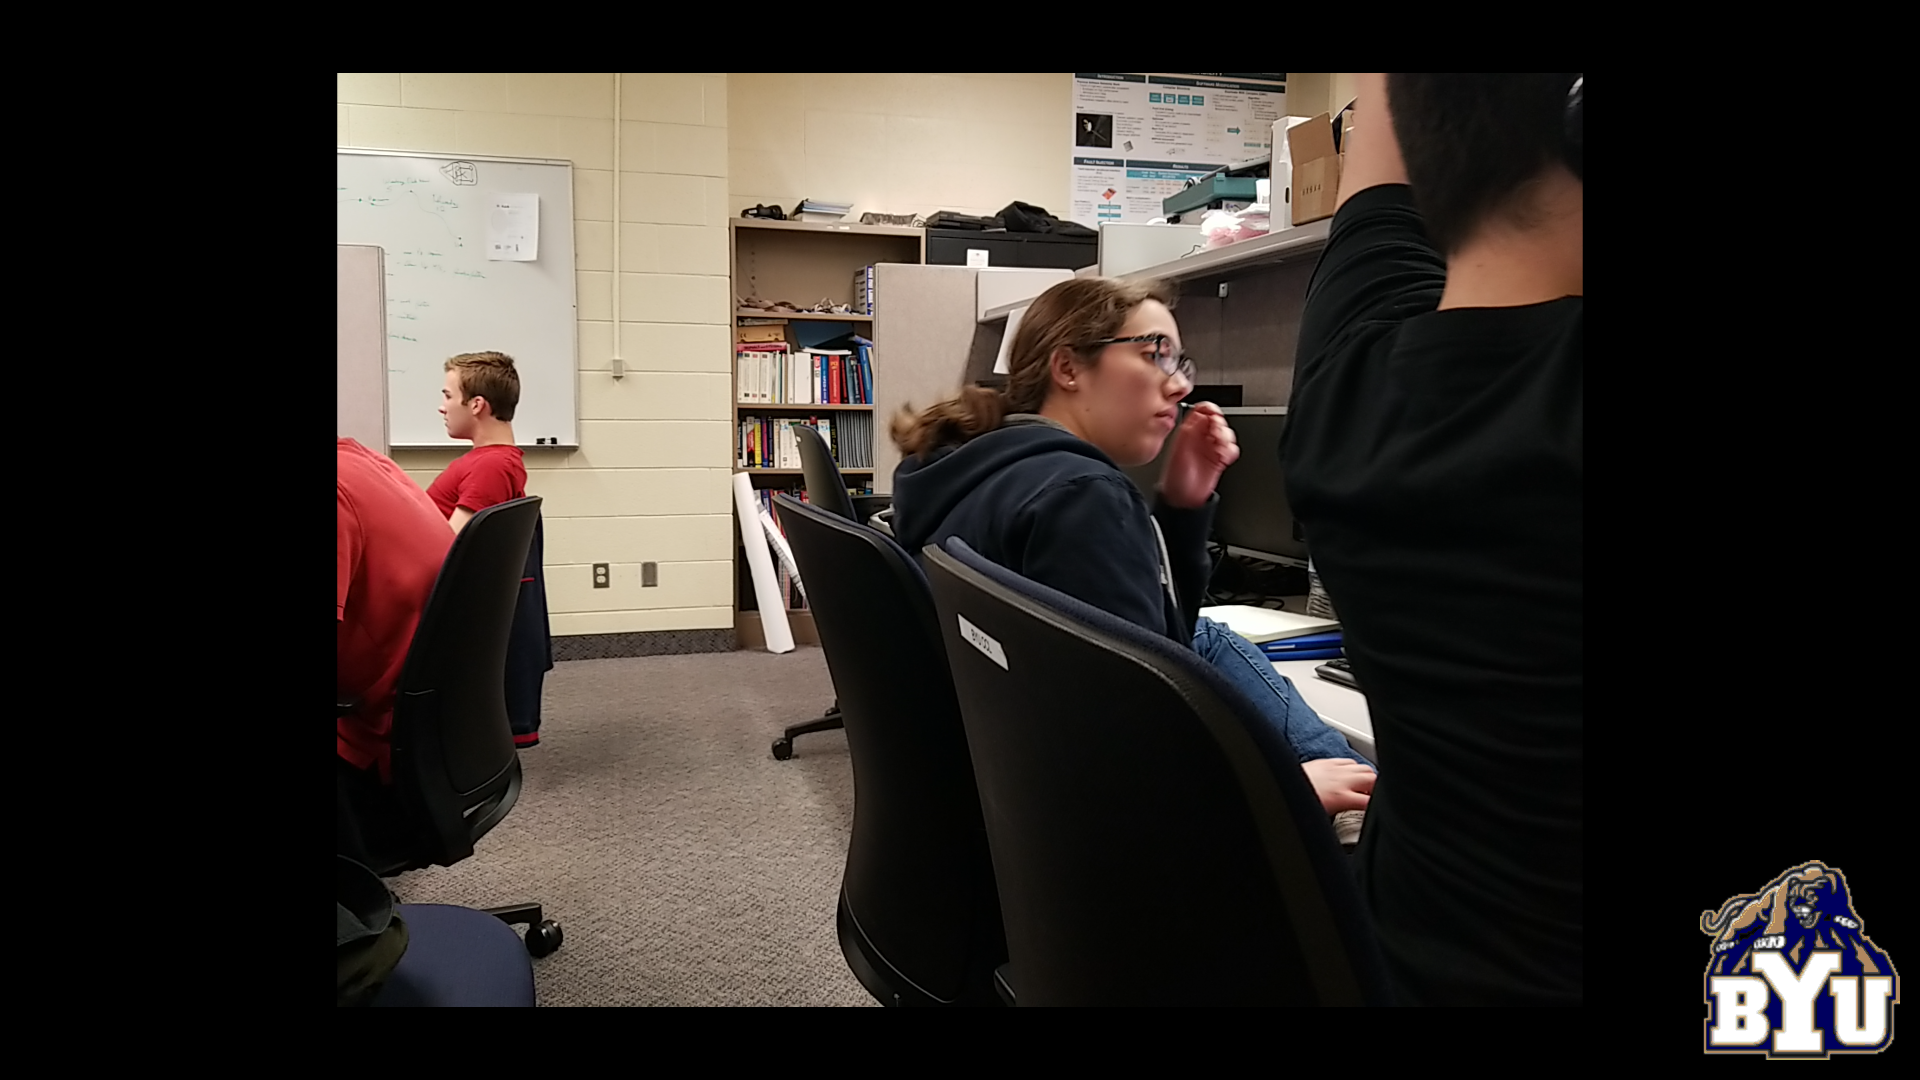

In [1050]:
import PIL.Image
import cv2
frame = hdmi_in.readframe()
frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
image = PIL.Image.fromarray(frame)
image

In [1065]:
pr_inst.filter_cmd("L0",0,400)
pr_inst.filter_cmd("L0",1,400)
pr_inst.filter_cmd("L0",6,0)
pr_inst.filter_cmd("L0",5,0)
filename = "./medallion_256.bin"
with open(filename, "rb") as f:
    width = f.read(1)
    height = f.read(1)
    num_pixels = width[0]*height[0]
    for i in range(0, num_pixels):
            byte = f.read(1)
            x = byte[0];
            pr_inst.filter_cmd("L0",4,x)

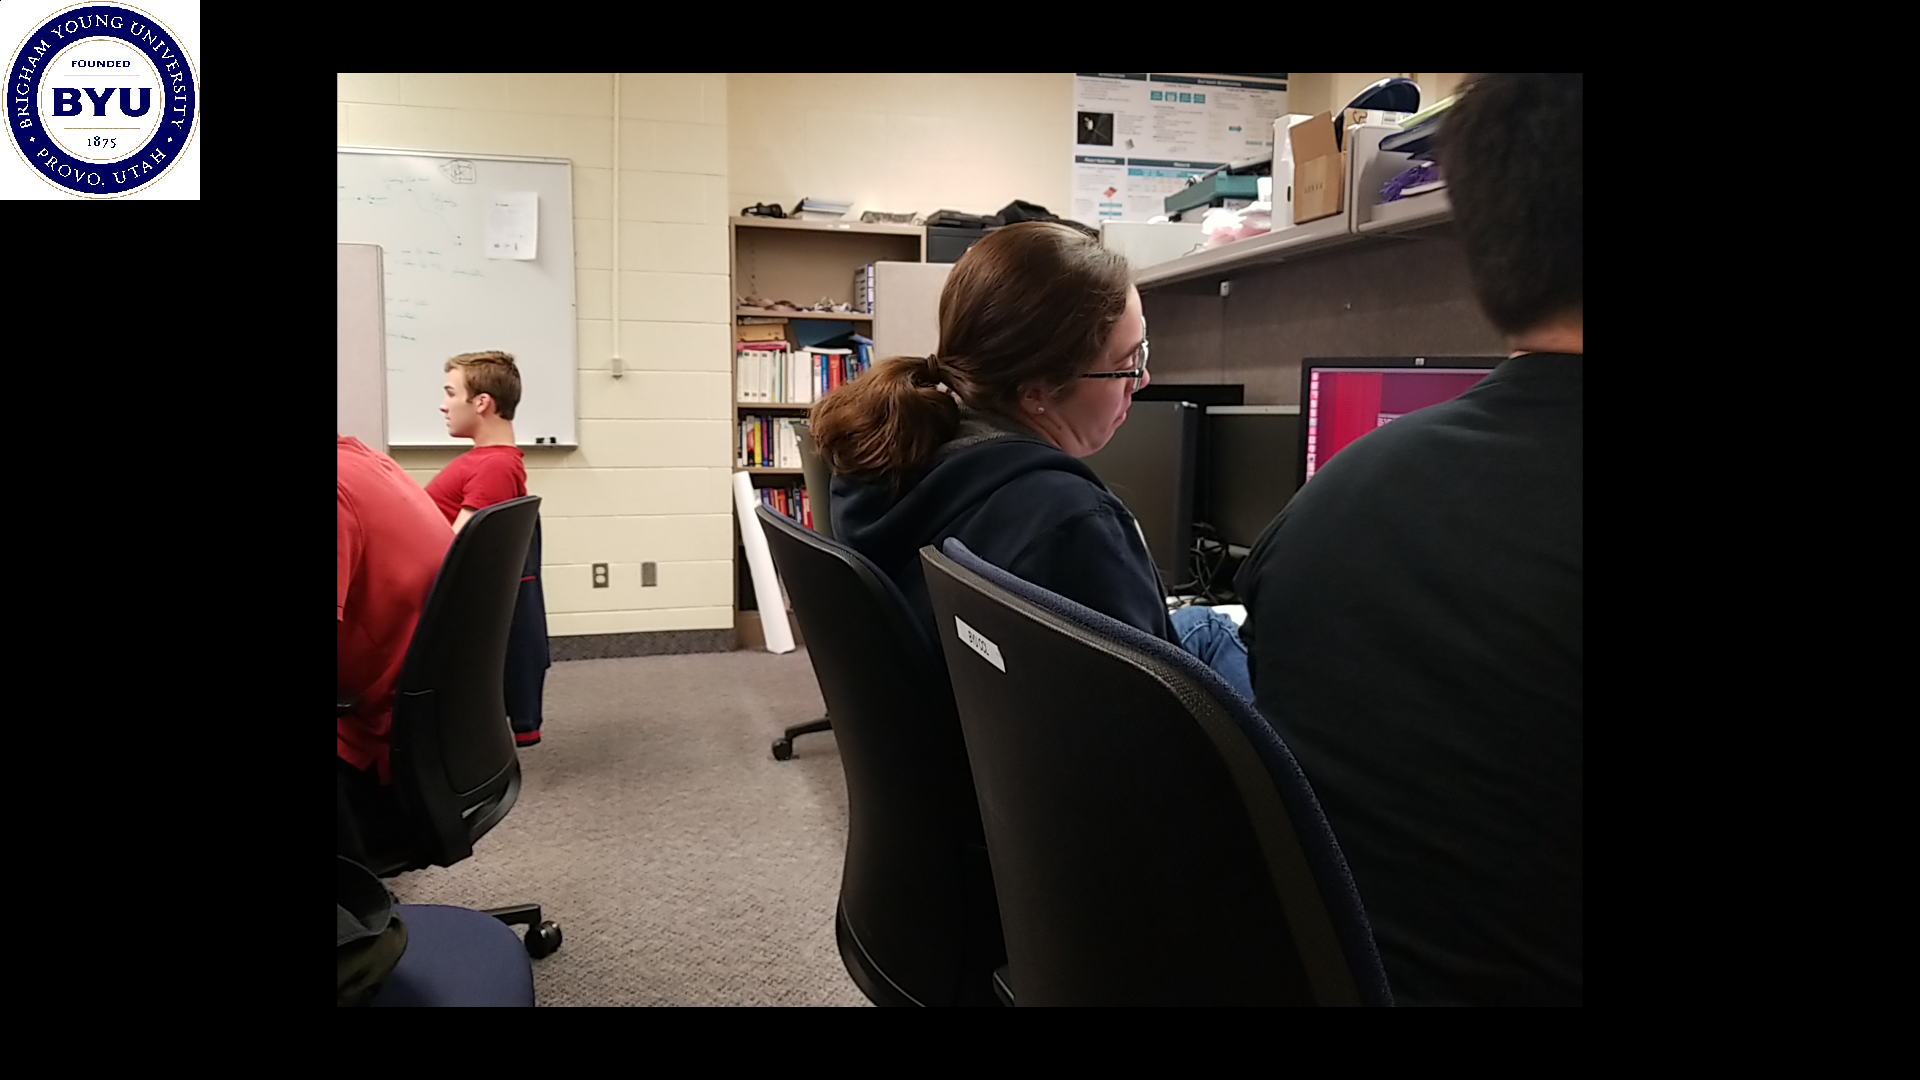

In [1052]:
import PIL.Image
import cv2
frame = hdmi_in.readframe()
frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
image = PIL.Image.fromarray(frame)
image

In [1053]:
hdmi_out.close()
hdmi_in.close()